<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
plt.style.use('default')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#ваш код здесь

hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

In [3]:
# Задание 2.1
# Чему равна размерность таблицы?

display(hh_data.shape)

(44744, 12)

Размерность таблицы составляет 44744 строки и 12 столбцов.

---

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
#ваш код здесь

display(hh_data.head(3))

Пол, возраст          ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982  20000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   
2                  Оператор   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано

In [5]:
# Задание 2.2
# В каком формате представлен порядок слов в признаке «Пол, возраст»?

print(hh_data.loc[0, 'Пол, возраст'])

Мужчина ,  39 лет , родился 27 ноября 1979


Порядок слов в признаке «Пол, возраст» представлен в формате <Пол ,  возраст , дата рождения>.

---

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
#ваш код здесь

# Задание 2.3
# Какой тип данных имеют все столбцы?

display(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Все столбцы имеют тип данных **object**.

---

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
#ваш код здесь

# Задание 2.4
# Выберите все признаки, в которых есть пропуски в данных.

# Выведем на экран названия столбцов, где число пропусков больше 0 (в процентах от общего кол-ва строк).

cols_null_percent = hh_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)

display(cols_with_null)

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

Итак, менее одного процента пропусков содержат столбцы (признаки) *'Опыт работы'*, *'Последняя/нынешняя должность'* и *'Последнее/нынешнее место работы'*.

---

5. Выведите основную статистическую информацию о столбцах.


In [8]:
#ваш код здесь

hh_data.describe(include=['object'])

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

In [9]:
# Задание 2.5
# Сколько уникальных значений содержится в столбце 'Опыт работы'?

# Смотрим в описательной таблице строку 'unique' соответствующего столбца.
# Или выводим с помощью кода:

display(hh_data['Опыт работы'].nunique())

44413

В столбце «Опыт работы» содержится 44413 уникальных значений.

In [10]:
# Задание 2.5
# Какая из искомых должностей самая распространённая?

# Смотрим в описательной таблице строку 'top' соответствующего столбца.
# Или выводим с помощью кода:

display(hh_data['Ищет работу на должность:'].mode()[0])

'Системный администратор'

Из искомых должностей самая распространённая - Системный администратор.

--

Общий вывод этапа 'Исследование структуры данных': 

Наши данные очень «сырые»: признаки представлены в неудобном для анализа и очистки формате.

---

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)
* Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота

Нас будет интересовать **только уровень образования**.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

--

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [11]:
#ваш код здесь

hh_df = hh_data.copy()

# Создаём новый признак 'Образование', применив функцию-преобразование к столбцу 'Образование и ВУЗ'.

# На вход данной функции поступает содержимое ячейки столбца (x).
# Если второй элемент в ячейке, разделенной по пробелам - 'образование', функция возвращает первый элемент, 
# приведенный к нижнему регистру,
# в ином случае функция возвращает первый элемент, приведенный к нижнему регистру, + пробел + второй элемент.

hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(
    lambda x: 
        x.split()[0].lower() if x.split()[1] == 'образование' 
        else x.split()[0].lower() + ' ' + x.split()[1]
)

# Проверяем полученные категории.
print(hh_df['Образование'].unique())

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


In [12]:
# Задание 3.1
# Сколько соискателей имеет средний уровень образования (школьное образование)?

print(hh_df[hh_df['Образование'] == 'среднее'].shape[0])

559


Средний уровень образования (школьное образование) имеют 559 соискателей.

In [13]:
# Удаляем признак 'Образование и ВУЗ'.

hh_df = hh_df.drop(['Образование и ВУЗ'], axis=1)

---

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в частностии на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '*. 

*Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [14]:
#ваш код здесь

# Создаём новый признак 'Пол', применив функцию-преобразование к столбцу 'Пол, возраст'.
# На вход данной функции поступает содержимое ячейки столбца (x) и функция возвращает
# первый элемент с индексом 0, то есть строки 'М' или 'Ж'.
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x[0])
print(hh_df['Пол'].unique())

# Создаём новый признак 'Возраст', применив функцию-преобразование к столбцу 'Пол, возраст'.
# В данном случае функция возвращает элементы с 11-го по 12-й индексы, то есть строку с возрастом,
# приведенную к типу int.
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: int(x[11:13]))

['М' 'Ж']


In [15]:
# Задание 3.2
# Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.

print(round(hh_df[hh_df['Пол'] == 'Ж'].shape[0]/hh_df.shape[0] * 100, 2))

19.07


В наших данных представлено 19,07 % женских резюме.

In [16]:
# Задание 3.2
# Чему равен средний возраст соискателей? Ответ округлите до десятых.

print(round(hh_df['Возраст'].mean(), 1))

32.2


Средний возраст соискателей: 32,2 года.

In [17]:
# Удаляем признак 'Пол, возраст'.

hh_df = hh_df.drop(['Пол, возраст'], axis=1)

---

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает **NaN**).
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значение "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает **NaN**).
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях).
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учитывайте эту особенность в вашем коде.

**В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель**.

Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [18]:
#ваш код здесь

def get_experience_in_months(arg):
# На вход данной функции поступает содержимое ячейки столбца (в нашем случае столбца 'Опыт работы').
    
    # Если ячейка не заполнена или в ней стоит строка 'Не указано', возвращаем NaN.
    if arg is np.nan or arg == 'Не указано':
        return None
    
    # Создаем списки ключевых слов для лет и месяцев.
    year_key_words = ['год', 'года', 'лет']
    month_key_words = ['месяц', 'месяца', 'месяцев']
    years = 0
    months = 0
    # Разбиваем строку на слова по пробелу и берем первые 6 слов.
    args_splited = arg.split(' ')[:7]
    
    # Создаем цикл по словам и их индексам в списке args_splited.
    for index, item in enumerate(args_splited):
        # Если слово есть в списке ключевых слов для лет, присваиваем переменной years кол-во лет,
        # взяв его из слова, предшествующего слову item, и приведя к типу int.
        if item in year_key_words:
            years = int(args_splited[index-1])
        # Проводим аналогичную операцию с месяцами.
        if item in month_key_words:
            months = int(args_splited[index-1])
    # Возвращаем опыт работы в месяцах.
    return years*12 + months

# Создаём новый признак 'Опыт работы (месяц)', применив функцию get_experience_in_months к столбцу 'Опыт работы'.
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience_in_months)

In [19]:
# Задание 3.3
# Чему равен медианный опыт работы (в месяцах) в нашей таблице?

hh_df['Опыт работы (месяц)'].median()

100.0

Медианный опыт работы (в месяцах) составляет 100 месяцев.

In [20]:
# Удаляем признак 'Опыт работы'.

hh_df = hh_df.drop(['Опыт работы'], axis=1)

---

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузке данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [21]:
#ваш код здесь

def get_city_category(arg):
# На вход данной функции поступает содержимое ячейки столбца (в нашем случае столбца 'Город, переезд, командировки').    
    
    # Инициализируем список городов-миллионников.
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
    'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    # Разбиваем строку на слова по пробелу.
    args_splited = arg.split(' ')
    
    # Если первое слово в списке args_splited - 'Москва' или 'Санкт-Петербург',
    # заносим в переменную city первое слово из списка.
    if args_splited[0] == 'Москва' or args_splited[0] == 'Санкт-Петербург':
        city = args_splited[0]
    # А если первое слово в списке args_splited есть в списке городов-миллионников,
    # заносим в переменную city строку 'город-миллионник'.
    elif args_splited[0] in million_cities:
        city = 'город-миллионник'
    # Во всех иных случаях заносим в переменную city строку 'другие'.
    else:
        city = 'другие'
    # Возвращаем переменную city, в которой хранится категория города.
    return city

# Создаём новый признак 'Город', применив функцию get_city_category к столбцу 'Город, переезд, командировки'.
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city_category)
print(hh_df['Город'].unique())

['другие' 'Москва' 'город-миллионник' 'Санкт-Петербург']


In [22]:
# Задание 3.4
# Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.

print(round(hh_df[hh_df['Город'] == 'Санкт-Петербург'].shape[0]/hh_df.shape[0] * 100))

11


В Санкт-Петербурге живут 11 процентов соискателей.

In [23]:
#ваш код здесь

def get_ready_to_move(arg):
# На вход данной функции поступает содержимое ячейки столбца (в нашем случае столбца 'Город, переезд, командировки').    
    
    # Если в ячейке есть подстроки 'не готов к переезду' или 'не готова к переезду', возвращаем False.
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    # А если в ячейке есть подстрока 'хочу', возвращаем True.
    elif 'хочу' in arg:
        return True
    # Во всех иных случаях возвращаем True.
    else:
        return True
    
# Создаём новый признак 'Готовность к переезду', применив функцию get_ready_to_move 
# к столбцу 'Город, переезд, командировки'.
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_move)
print(hh_df['Готовность к переезду'].unique())

[False  True]


In [24]:
#ваш код здесь

def get_ready_for_business_trips(arg):
# На вход данной функции поступает содержимое ячейки столбца (в нашем случае столбца 'Город, переезд, командировки').    
    
    # Если в ячейке есть подстрока 'командировка',
    if ('командировка' in arg):
        # и, если в ячейке есть подстроки 'не готов к командировкам' или 'не готова к командировкам',
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            # возвращаем False.
            return False
        # иначе возвращаем True.
        else: 
            return True
    # Если в ячейке нет подстроки 'командировка', возвращаем False.
    else:
        return False
    
# Создаём новый признак 'Готовность к командировкам', применив функцию get_ready_for_business_trips
# к столбцу 'Город, переезд, командировки'.
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_ready_for_business_trips)
print(hh_df['Готовность к командировкам'].unique())

[False  True]


In [25]:
# Задание 3.4
# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

print(round(hh_df[hh_df['Готовность к переезду'] & hh_df['Готовность к командировкам']].shape[0]/hh_df.shape[0] * 100))

32


Одновременно и к переездам, и к командировкам готовы 32 процента соискателей.

In [26]:
# Удаляем признак 'Город, переезд, командировки'.

hh_df = hh_df.drop(['Город, переезд, командировки'], axis=1)

---

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте **создадим признаки-мигалки** для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется ***One Hot Encoding*** и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы.

In [27]:
#ваш код здесь

# Создаём новые признаки-мигалки, применив функцию-преобразование к столбцам 'Занятость' и 'График'.

hh_df['полная занятость'] = hh_df['Занятость'].apply(lambda x: True if ('полная занятость' in x) else False)
hh_df['частичная занятость'] = hh_df['Занятость'].apply(lambda x: True if ('частичная занятость' in x) else False)
hh_df['проектная работа'] = hh_df['Занятость'].apply(lambda x: True if ('проектная работа' in x) else False)
hh_df['волонтерство'] = hh_df['Занятость'].apply(lambda x: True if ('волонтерство' in x) else False)
hh_df['стажировка'] = hh_df['Занятость'].apply(lambda x: True if ('стажировка' in x) else False)

hh_df['полный день'] = hh_df['График'].apply(lambda x: True if ('полный день' in x) else False)
hh_df['сменный график'] = hh_df['График'].apply(lambda x: True if ('сменный график' in x) else False)
hh_df['гибкий график'] = hh_df['График'].apply(lambda x: True if ('гибкий график' in x) else False)
hh_df['удаленная работа'] = hh_df['График'].apply(lambda x: True if ('удаленная работа' in x) else False)
hh_df['вахтовый метод'] = hh_df['График'].apply(lambda x: True if ('вахтовый метод' in x) else False)

In [28]:
# Задание 3.5
# Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?

print(hh_df[hh_df['проектная работа'] & hh_df['волонтерство']].shape[0])

436


Одновременно проектную работу и волонтёрство ищут 436 соискателей.

In [29]:
# Задание 3.5
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?

print(hh_df[hh_df['вахтовый метод'] & hh_df['гибкий график']].shape[0])

2311


Одновременно хотят работать вахтовым методом и с гибким графиком 2311 соискателей.

In [30]:
# Удаляем признаки 'Занятость' и 'График'.

hh_df = hh_df.drop(['Занятость', 'График'], axis=1)

---

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, **MDF.RU**: данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**.

**Создайте новый DataFrame из полученного файла**. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. 

Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.

Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [31]:
#ваш код здесь

# Создаем новый DataFrame из файла с курсами валют.
exchange_rates_data = pd.read_csv('data/ExchangeRates.csv', sep=',')
exch_rat_df = exchange_rates_data.copy()

# Обновляем признак 'Обновление резюме', переведя его в формат datetime и выделив из него дату.
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date

# Переводим в формат datetime признак 'date' из таблицы с курсами валют.
exch_rat_df['date'] = pd.to_datetime(exch_rat_df['date'], dayfirst=True).dt.date

# Выделяем из столбца 'ЗП' сумму желаемой заработной платы.
hh_df['Сумма ЗП'] = hh_df['ЗП'].apply(lambda x: int(x.split()[0]))

# Выделяем из столбца 'ЗП' наименование валюты, в которой она исчисляется.
hh_df['Валюта ЗП'] = hh_df['ЗП'].apply(lambda x: x.split()[1])

# Переводим наименование валют в стандарт ISO.
iso_currencies = {
    'руб.': 'RUB',
    'бел.руб.': 'BYN',
    'грн.': 'UAH',
    'сум': 'UZS'
}

hh_df['Валюта ISO'] = hh_df['Валюта ЗП'].apply(lambda x: x if x not in iso_currencies else iso_currencies[x])

# Присоединяем к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты.
hh_df = hh_df.merge(
    exch_rat_df,
    left_on=['Обновление резюме', 'Валюта ISO'],
    right_on=['date', 'currency'],
    how='left'
)

# Пустые (NaN) значения close и proportion для рубля заполняем единицей.
hh_df['close'] = hh_df['close'].fillna(1)
hh_df['proportion'] = hh_df['proportion'].fillna(1)

# Создаём новый признак 'ЗП (руб)'.
hh_df['ЗП (руб)'] = (hh_df['Сумма ЗП'] * hh_df['close']) / hh_df['proportion']

C:\Users\userr\AppData\Local\Temp\ipykernel_1852\3900896138.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exch_rat_df['date'] = pd.to_datetime(exch_rat_df['date'], dayfirst=True).dt.date


In [32]:
# Задание 3.6
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
# Ответ приведите в тысячах рублей и округлите до целого. 

print(round(hh_df['ЗП (руб)'].median() / 1000))

59


Желаемая медианная заработная плата соискателей равна 59-ти тысячам рублей.

In [33]:
# Удаляем все ненужные признаки.

hh_df = hh_df.drop(['ЗП', 'Сумма ЗП', 'Валюта ЗП', 'Валюта ISO', 
                    'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'], axis=1)

In [34]:
# Сверяем получившуюся таблицу с эталонным вариантом.
display(hh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

None

--

Общий вывод этапа 'Преобразование данных': 

Наша таблица после всех преобразований соответствует эталону по количеству строк, количеству и наименованию столбцов, а также по типам данных в столбцах.

Теперь таблица готова для первичного анализа зависимостей и для очистки.

---

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: 

   * Чему равна мода распределения? 
   * Каковы предельные значения признака, в каком примерном интервале находится возраст **большинства** соискателей? 
   * Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
   
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [57]:
#ваш код здесь

# С помощью plotly express строим гистограмму и коробчатую диаграмму рядом.

age_distribution = px.histogram(
    data_frame=hh_df,
    x='Возраст',
    title='Распределение возраста соискателей',
    height=500,
    width=1000,
    marginal='box'
)

age_distribution.update_layout(yaxis_title='Количество соискателей')

age_distribution.show()

График можно посмотреть [здесь](./plotly/1_age_distribution.html).

In [36]:
# Задание 4.1
# Чему равно модальное значение возраста соискателей?

# Смотрим по графику или выводим с помощью кода:

print(hh_df['Возраст'].mode()[0])

30


Ваши выводы по графику здесь:

Модальное (самое распространенное) значение возраста соискателей равно 30 годам.

Предельные значения признака: слева - 10 лет, справа - 77 лет.

Возраст большинства соискателей находится примерно в интервале от 20 до 48 лет.

Аномалии для признака возраста имеются. Явной аномалией является возраст 10 лет. Также вполне вероятно наличие аномалий для возраста старше 70 лет. Согласно теории Тьюки, аномалиями следует считать и любой возраст от 50 лет и выше.

---

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: 
   * Чему равна мода распределения? 
   * Каковы предельные значения признака, в каком примерном интервале находится опыт работы **большинства** соискателей? 
   * Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [58]:
#ваш код здесь

# С помощью plotly express строим гистограмму и коробчатую диаграмму рядом.

work_experience_distribution = px.histogram(
    data_frame=hh_df,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей в месяцах',
    height=500,
    width=1000,
    marginal='box'
)

work_experience_distribution.update_layout(yaxis_title='Количество соискателей')

work_experience_distribution.show()

График можно посмотреть [здесь](./plotly/2_work_experience_distribution.html).

In [38]:
# Задание 4.2
# Чему равен максимальный опыт работы (в месяцах)?

# Смотрим по графику или выводим с помощью кода:

print(hh_df['Опыт работы (месяц)'].max())

1188.0


Максимальный опыт работы составляет 1188 месяцев.

In [39]:
# Так как по графику точное модальное значение определить невозможно, рассчитаем его с помощью кода.

print(hh_df['Опыт работы (месяц)'].mode()[0])

81.0


Ваши выводы здесь:

Модальное (самое распространенное) значение опыта работы равно 81 месяцу.

Предельные значения признака: от 1 слева, до 1188 справа.

Опыт работы большинства соискателей находится примерно в интервале от 1 до 290 месяцев.

Аномалии для признака имеются. Явной аномалией является максимальный опыт работы 1188 месяцев, что соответствует 99-ти годам. Также возможно наличие аномалий для опыта работы от 600 до 700 месяцев. Согласно теории Тьюки, аномалиями следует считать и любой опыт работы от 300 месяцев и больше.

---

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы:
   * Чему равна мода распределения?
   * Каковы предельные значения признака, в каком примерном интервале находится заработная плата **большинства** соискателей? 
   * Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым? Обратите внимание на гигантские размеры желаемой заработной платы.

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [61]:
#ваш код здесь

# С помощью plotly express строим гистограмму и коробчатую диаграмму рядом.

salary_distribution = px.histogram(
    data_frame=hh_df,
    x='ЗП (руб)',
    title='Распределение желаемой заработной платы соискателей',
    width=5000,
    marginal='box'
)

salary_distribution.update_layout(
    xaxis_title='Желаемая заработная плата',
    yaxis_title='Количество соискателей'    
)

salary_distribution.show()

# Задание 4.3
# Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.

График можно посмотреть [здесь](./plotly/3_salary_distribution.html).

Получили типичный пример распределения с выбросами в данных.

Исходя из графика, заработную плату выше 1 миллиона рублей хотят 5 соискателей.

Построим новый график, убрав желаемые зарплаты свыше 1 миллиона рублей.

In [62]:
#ваш код здесь

salary_distribution_2 = px.histogram(
    data_frame=hh_df[hh_df['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    labels={'ЗП (руб)': 'Желаемая заработная плата соискателей'},
    title='Распределение желаемой заработной платы соискателей',
    height=500,
    width=1000,
    marginal='box'
)

salary_distribution_2.update_layout(
    xaxis_title='Желаемая заработная плата',
    yaxis_title='Количество соискателей'    
)

salary_distribution_2.show()

График можно посмотреть [здесь](./plotly/4_salary_distribution_2.html).

In [42]:
# Так как по графику точное модальное значение определить невозможно, рассчитаем его с помощью кода.

print(hh_df['ЗП (руб)'].mode()[0])

50000.0


Ваши выводы здесь:

Модальное (самое распространенное) значение желаемой заработной платы соискателей составляет 50 тысяч рублей.

Предельные значения признака: от 1 слева, до 24304876 справа.

Интервал желаемой заработной платы большинства соискателей после построения гистограммы обычным способом установить очень сложно. Это происходит из-за наличия нескольких значений, превышающих 1 миллион рублей, особенно крайнего правого значения в 24 с лишним миллиона рублей. Если отбросить пять крайних значений, превышающих 1 миллион рублей, то можно сказать, что желаемая заработная плата большинства соискателей находится в интервале до 200000 рублей.

Явной аномалией для признака является зарплата в 24 с лишним миллиона рублей. Также, скорее всего, аномалиями являются и четыре остальные зарплаты, превышающие 1 миллион рублей. Согласно теории Тьюки, аномалиями следует считать и любую зарплату от 180 тысяч и больше.

---

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [43]:
#ваш код здесь

# С помощью plotly express строим столбчатую диаграмму.

salary_and_education = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Образование',as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=salary_and_education,
    x='ЗП (руб)',
    y='Образование',
    height=500, 
    width=1000,
    labels={'ЗП (руб)': 'Медианная желаемая заработная плата'}, 
    title='Зависимость медианной желаемой зарплаты от уровня образования'
)

fig.show()

# Задание 4.4
# Какая категория образования оплачивается выше всех по медианному показателю?

График можно посмотреть [здесь](./plotly/5_salary_and_education.html).

Исходя из графика, выше всех по медианному показателю оплачивается категория высшего образования.

Ваши выводы здесь:

Наибольший уровень медианной желаемой заработной платы (60 тысяч рублей) наблюдается для уровня образования 'высшее'. Наименьший уровень медианной желаемой заработной платы (40 тысяч рублей) наблюдается в равной степени для уровней образования 'среднее' и 'среднее специальное'.

Разброс медианной желаемой заработной платы довольно небольшой, от 40 до 60 тысяч. Возможно признак уровня образования при прогнозировании заработной платы не так уж и важен.

---

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [44]:
#ваш код здесь

# С помощью plotly express строим коробчатую диаграмму.

salary_and_city = px.box(
    data_frame=hh_df[hh_df['ЗП (руб)'] < 1000000],
    x='ЗП (руб)',
    y='Город',
    height=500, 
    width=1000, 
    color='Город',
    labels={'ЗП (руб)': 'Желаемая заработная плата'},
    title='Распределение желаемой заработной платы в зависимости от города'
)

salary_and_city.show()

# Задание 4.5
# В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?

График можно посмотреть [здесь](./plotly/6_salary_and_city.html).

Исходя из графика, наибольший показатель желаемой заработной платы (~924 тысячи рублей) зафиксирован в категории городов 'другие'.

Ваши выводы здесь:

Из полученной диаграммы можно заметить, что чем больше медианный уровень желаемой заработной платы, тем больше межквартильный размах. Считаю, что уровень желаемой заработной платы довольно сильно зависит от категории города и, следовательно, признак города важен при прогнозировании заработной платы.

---

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [45]:
#ваш код здесь

# С помощью plotly express строим многоуровневую столбчатую диаграмму.

salary_and_removal_and_business_trips = hh_df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=salary_and_removal_and_business_trips,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    labels={'ЗП (руб)': 'Медианная желаемая заработная плата'},
    title='Зависимость медианной заработной платы от готовности к командировкам/переезду'
)

fig.show()

# Задание 4.6
# Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? 
# Ответ приведите в тысячах, округлив до целого (например, 45).

График можно посмотреть [здесь](./plotly/7_salary_and_removal_and_business_trips.html).

Ваши выводы здесь:

По убывающей медианный уровень желаемой заработной платы распределяется так: самый большой (около 66 тысяч) у тех, кто готов и к командировкам, и к переезду; далее (60 тысяч) у тех, кто готов к командировкам, но не готов к переезду; далее (50 тысяч) у тех, кто готов к переезду, но не готов к командировкам; менее всего (40 тысяч) у тех, кто не готов ни к командировкам, ни к переезду.

---

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [49]:
#ваш код здесь

# Строим сводную таблицу зависимости медианной желаемой заработной платы от возраста и образования.

salary_and_age_and_education = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

display(salary_and_age_and_education)

Возраст                   10       14       15         16       17       18  \
Образование                                                                   
высшее                   0.0  60000.0      0.0  122582.49  90075.5  30000.0   
неоконченное высшее      0.0      0.0      0.0       0.00  80000.0  25000.0   
среднее                  0.0      0.0  10000.0       0.00  44000.0  35000.0   
среднее специальное  60000.0      0.0   2000.0   30000.00  25000.0  25151.0   

Возраст                   19       20       21       22  ...       66  \
Образование                                              ...            
высшее               30000.0  30000.0  35000.0  40000.0  ...  65000.0   
неоконченное высшее  30000.0  31000.0  35000.0  40000.0  ...      0.0   
среднее              45000.0  29000.0  40000.0  40000.0  ...      0.0   
среднее специальное  30000.0  30000.0  30000.0  30000.0  ...      0.0   

Возраст                    67       68        69       70       71       72  \
Образование                                                                   
высшее                70000.0  79000.0  112500.0  80000.0  75000.0  75000.0   
неоконченное высшее       0.0      0.0       0.0      0.0      0.0      0.0   
среднее                   0.0      0.0       0.0      0.0      0.0      0.0   
среднее специальное  120000.0      0.0       0.0      0.0      0.0      0.0   

Возраст                   73       76       77  
Образование                                     
высшее               62500.0  45000.0  90000.0  
неоконченное высшее      0.0      0.0      0.0  
среднее                  0.0      0.0      0.0  
среднее специальное      0.0      0.0      0.0  

[4 rows x 63 columns]

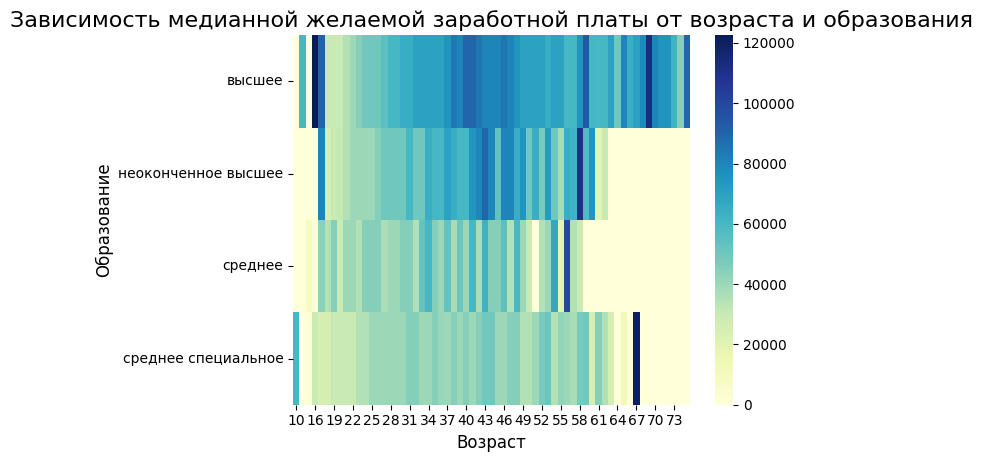

In [52]:
#ваш код здесь

# С помощью seaborn строим тепловую карту на основе полученной сводной таблицы.

heatmap = sns.heatmap(data=salary_and_age_and_education, cmap='YlGnBu')

heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и образования', fontsize=16)
heatmap.set_xlabel('Возраст', fontsize=12)
heatmap.set_ylabel('Образование', fontsize=12);

# Задание 4.7
# Для какой категории образования наблюдается самый быстрый карьерный рост 
# (то есть интенсивность роста заработной платы наибольшая)?

Ваши выводы здесь:

Самый быстрый карьерный рост (то есть наибольшая интенсивность роста медианной желаемой заработной платы с увеличением возраста) наблюдается для соискателей с высшим образованием. На втором месте соискатели с неоконченным высшим образованием. Наименьший карьерный рост у обладателей среднего специального образования.

---

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

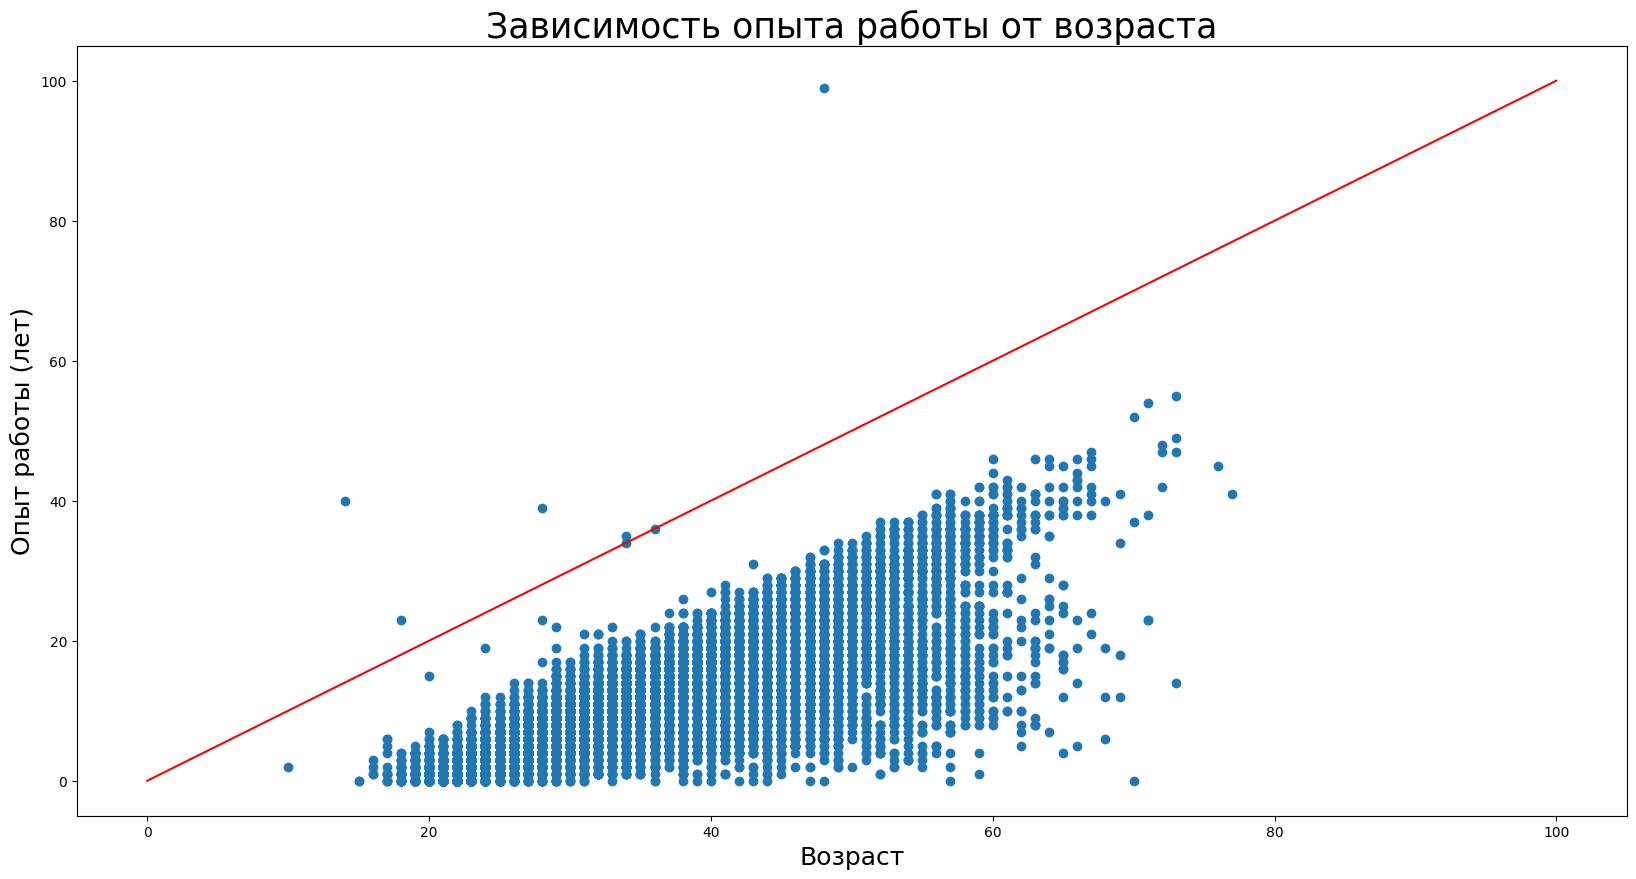

In [73]:
#ваш код здесь

# Переводим опыт работы из месяцев в годы.

hh_df['Опыт работы (лет)'] = round(hh_df['Опыт работы (месяц)'] / 12)

# С помощью matplotlib (модульный подход) строим диаграмму рассеяния.

fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(x=hh_df['Возраст'], y=hh_df['Опыт работы (лет)'])
plt.title('Зависимость опыта работы от возраста', fontsize=25)
plt.xlabel('Возраст', fontsize=18)
plt.ylabel('Опыт работы (лет)', fontsize=18)

# Строим дополнительную прямую, проходящую через точки (0, 0) и (100, 100).

plt.plot([0, 100], [0, 100], color='red') 

plt.show()

In [83]:
# Задание 4.8
# Сколько точек лежат строго выше построенной прямой? 
# Так как точки могут сливаться с прямой, то для ответа на этот вопрос проще всего воспользоваться 
# интерактивной визуализацией либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.

# С помощью plotly express строим диаграмму рассеяния с дополнительной прямой, 
# проходящей через точки (0, 0) и (100, 100).

import plotly.graph_objects as go

age_and_work_experience = px.scatter(
    data_frame=hh_df,
    x='Возраст',
    y='Опыт работы (лет)',
    width=900,
    height=600,
    title='Зависимость опыта работы от возраста'
)

age_and_work_experience.update_layout(
    xaxis_title='Возраст',
    yaxis_title='Опыт работы (лет)'
)

reference_line = go.Scatter(x=[0, 100],
                            y=[0, 100],
                            mode="lines",
                            line=go.scatter.Line(color="red"),
                            showlegend=False)

age_and_work_experience.add_trace(reference_line)

age_and_work_experience.show()

График можно посмотреть [здесь](./plotly/8_age_and_work_experience.html).

In [81]:
# Выясняем сколько точек лежат выше или на прямой с помощью фильтрации.

hh_df[(hh_df['Опыт работы (лет)']) >= (hh_df['Возраст'])].shape[0]

7

Ваши выводы здесь:

Согласно интерактивному графику (а также фильтрации), количество соискателей с опытом работы превышающим или равным возрасту составляет 7 человек.

Также, согласно тому же графику, еще имеются соискатели, у которых опыт работы явно завышен (например, возраст - 20 лет, опыт работы - 15 лет). Их можно отследить по точкам, которые наиболее приближены к линии с нижней стороны.

Общий вывод, разумеется, состоит в том, что с увеличением возраста соискателя увеличивается и его опыт работы.

In [85]:
hh_df = hh_df.drop(['Опыт работы (лет)'], axis=1)

---

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [88]:
# ваш код здесь

# С помощью plotly express построим столбчатую диаграмму зависимости медианной желаемой
# заработной платы от пола соискателя.

salary_and_sex = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby('Пол',as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=salary_and_sex,
    x='ЗП (руб)',
    y='Пол',
    height=400, 
    width=900, 
    title='Зависимость медианной желаемой зарплаты от пола соискателя'
)

fig.update_layout(
    xaxis_title='Медианная желаемая заработная плата',
    yaxis_title='Пол соискателя'
)

fig.show()

График можно посмотреть [здесь](./plotly/9_salary_and_sex.html).

Ваши выводы здесь:

Из полученной диаграммы видно, что медианная желаемая заработная плата соискателей-мужчин больше на 12 тысяч (то есть на 20 процентов), чем у соискателей-женщин.

---

In [89]:
#ваш код здесь

# Построим сводную таблицу зависимости медианной желаемой заработной платы от возраста и пола.

salary_and_age_and_sex = hh_df.pivot_table(
    values='ЗП (руб)',
    index='Пол',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)

display(salary_and_age_and_sex)

Возраст       10       14      15       16       17       18       19  \
Пол                                                                     
Ж            0.0      0.0     0.0      0.0  25000.0  22500.0  30000.0   
М        60000.0  60000.0  6000.0  40000.0  30000.0  30000.0  30000.0   

Возраст       20       21       22  ...       66       67       68        69  \
Пол                                 ...                                        
Ж        25000.0  30000.0  30000.0  ...      0.0      0.0      0.0   45000.0   
М        30000.0  35000.0  40000.0  ...  65000.0  80000.0  79000.0  180000.0   

Возраст        70       71       72       73       76       77  
Пол                                                             
Ж         25000.0      0.0  25000.0  85000.0      0.0      0.0  
М        215000.0  75000.0  77500.0  50000.0  45000.0  90000.0  

[2 rows x 63 columns]

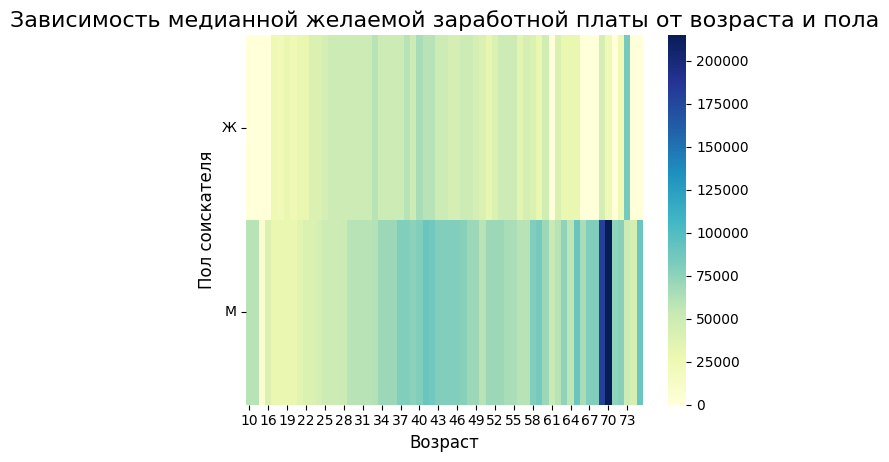

In [94]:
#ваш код здесь

# С помощью seaborn строим тепловую карту на основе полученной сводной таблицы.

heatmap = sns.heatmap(data=salary_and_age_and_sex, cmap='YlGnBu')

heatmap.set_title('Зависимость медианной желаемой заработной платы от возраста и пола', fontsize=16)
heatmap.set_xlabel('Возраст', fontsize=12)
heatmap.set_ylabel('Пол соискателя', fontsize=12)
heatmap.yaxis.set_tick_params(rotation=0);

Ваши выводы здесь:

Из полученного графика видно, что карьерный рост (то есть интенсивность роста медианной желаемой заработной платы с увеличением возраста) заметно больше у соискателей-мужчин.

--

Общий вывод этапа 'Исследование зависимостей в данных': 

При проведении визуального (разведывательного) анализа были обнаружены несостыковки в данных: пропуски, гигантские размеры желаемых заработных плат, резюме людей слишком «преклонного» возраста, опыт работы, превышающий возраст.

Всё это говорит о том, что данные подлежат очистке.

---

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [98]:
print(f'Исходное число записей: {hh_df.shape[0]}')

Исходное число записей: 44744


In [96]:
#ваш код здесь

# Ищем полные дубликаты.

hh_df_duplicates = hh_df[hh_df.duplicated()]

# Задание 5.1
# Сколько полных копий удалось найти?

print(f'Число найденных дубликатов: {hh_df_duplicates.shape[0]}')

Число найденных дубликатов: 161


Удалось найти 161 полную копию.

In [97]:
# Удаляем полные дубликаты.

hh_df_cleaned = hh_df.drop_duplicates()

print(f'Результирующее число записей: {hh_df_cleaned.shape[0]}')

Результирующее число записей: 44583


---

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [101]:
#ваш код здесь

# Выводим информацию о числе пропусков в столбцах.

cols_null_sum = hh_df_cleaned.isnull().sum()
cols_with_null = cols_null_sum[cols_null_sum > 0].sort_values(ascending=False)

display(cols_with_null)

# Задание 5.2
# Сколько пропусков в столбце «Опыт работы (месяц)»?

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

В столбце «Опыт работы (месяц)» найдено 168 пропусков.

---

3. Итак, у нас есть пропуски в 3-х столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [102]:
#ваш код здесь

# Заполняем пропуски в столбце с опытом работы медианным значением.

hh_df_cleaned = hh_df_cleaned.fillna(value={'Опыт работы (месяц)': hh_df_cleaned['Опыт работы (месяц)'].median()})

# Выводим информацию о числе оставшихся пропусков в столбцах.

cols_null_sum = hh_df_cleaned.isnull().sum()
cols_with_null = cols_null_sum[cols_null_sum > 0].sort_values(ascending=False)

display(cols_with_null)

Последняя/нынешняя должность       2
Последнее/нынешнее место работы    1
dtype: int64

In [103]:
# Удаляем оставшиеся строки, где есть пропуски.

hh_df_cleaned = hh_df_cleaned.dropna(how='any', axis=0)

print(f'Результирующее число записей: {hh_df_cleaned.shape[0]}')

Результирующее число записей: 44581


In [105]:
# Задание 5.3
# Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? 
# Ответ округлите до целых.

print(round(hh_df_cleaned['Опыт работы (месяц)'].mean()))

114


Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков равно 114 месяцам.

---

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [106]:
#ваш код здесь

# Находим резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

salary_outliers = hh_df_cleaned[(hh_df_cleaned['ЗП (руб)'] > 1000000) | (hh_df_cleaned['ЗП (руб)'] < 1000)]

# Задание 5.4
# Сколько выбросов вы нашли?

print(salary_outliers.shape[0])

89


Найдено 89 искомых выбросов.

In [107]:
# Удаляем резюме с выбросами по зарплате.

hh_df_cleaned = hh_df_cleaned.drop(salary_outliers.index, axis=0)

print(f'Результирующее число записей: {hh_df_cleaned.shape[0]}')

Результирующее число записей: 44492


---

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [108]:
#ваш код здесь

# Находим резюме, в которых опыт работы в годах превышает или равен возрасту соискателя.

work_experience_in_years = round(hh_df_cleaned['Опыт работы (месяц)'] / 12)
age_outliers = hh_df_cleaned[work_experience_in_years >= hh_df_cleaned['Возраст']]

# Задание 5.5
# Сколько выбросов вы нашли?

print(age_outliers.shape[0])

7


Найдено 7 искомых выбросов.

In [109]:
# Удаляем резюме с выбросами по опыту работы и возрасту.

hh_df_cleaned = hh_df_cleaned.drop(age_outliers.index, axis=0)

print(f'Результирующее число записей: {hh_df_cleaned.shape[0]}')

Результирующее число записей: 44485


---

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода **axvline**. Например, построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

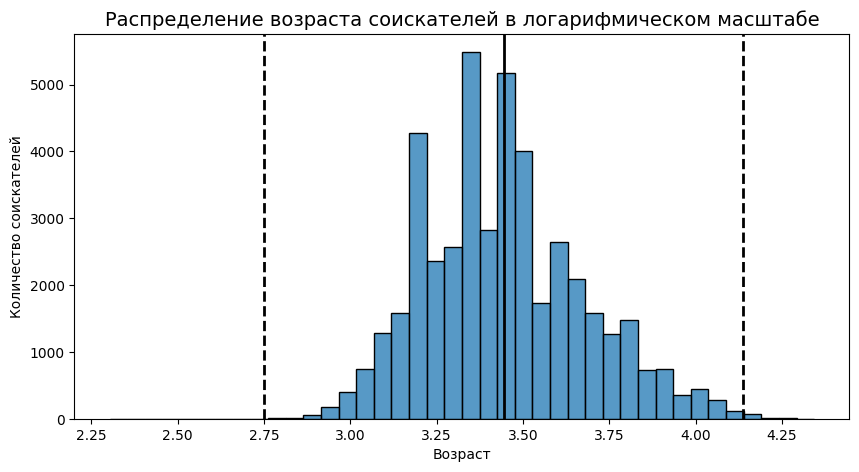

In [113]:
#ваш код здесь

# Строим гистограмму распределения признака 'Возраст' в логарифмическом масштабе 
# с добавлением к графику линий, отображающих среднее и границы интервала метода трех сигм.

fig, ax = plt.subplots(figsize=(10, 5))

log_age = np.log(hh_df_cleaned['Возраст'])

histplot = sns.histplot(log_age, bins=40, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3*log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3*log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста соискателей в логарифмическом масштабе', fontsize=14)
histplot.set_ylabel('Количество соискателей');

In [114]:
# Проверяем в какую сторону асимметрично логарифмическое распределение.

print(log_age.skew())

0.4474582108078904


Распределение имеет правостороннюю асимметрию. Это же видно и из графика (среднее значение находится правее моды).

In [115]:
# Пишем функцию, реализующую алгоритм метода z-отклонения, имеющую возможность работать в логарифмическом масштабе 
# и возможность задавать число сигм (стандартных отклонений) влево и вправо соответственно, 
# определяющее границы метода z-отклонения.

def outliers_z_score(data, feature, log_scale=False, left=3, right=3):   
# На вход данной функции поступают DataFrame и признак, по которому ищутся выбросы.
    
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    # Функция возвращает выбросы и очищенные от них данные.
    return outliers, cleaned

In [116]:
# Сначала применим функцию с числом сигм по умолчанию (3 сигмы).

outliers, cleaned = outliers_z_score(hh_df_cleaned, 'Возраст', log_scale=True)

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 112
Результирующее число записей: 44373


Получилось выявить в столбце 'Возраст' 112 выбросов.

In [117]:
# Посмотрим, что это за выбросы.

print(outliers['Возраст'].unique())

[72 71 63 64 68 73 66 65 77 67 69 76 70 15 10]


В число выбросов вошли возраста соискателей до 15-ти лет и от 63-х и старше.

In [118]:
# Теперь применим функцию с "послаблением" на 1 сигму (4 сигмы) в правую сторону.

outliers, cleaned = outliers_z_score(hh_df_cleaned, 'Возраст', log_scale=True, right=4)

print(f'Число выбросов по методу z-отклонения с послаблением на 1 сигму: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Задание 5.6
# Сколько выбросов вы нашли с помощью метода z-отклонений?

Число выбросов по методу z-отклонения с послаблением на 1 сигму: 3
Результирующее число записей: 44482


На этот раз обнаружилось всего 3 выброса.

In [119]:
# Выведем таблицу с полученными выбросами.

display(outliers['Возраст'])

31137    15
32950    15
33654    10
Name: Возраст, dtype: int64

Получается, что с послаблением на 1 сигму под категорию выбросов попали только соискатели с возрастом до 15-ти лет.

In [130]:
# Удаляем резюме с выбросами по возрасту.

hh_df_cleaned = hh_df_cleaned.drop(outliers.index, axis=0)

print(f'Результирующее число записей: {hh_df_cleaned.shape[0]}')

Результирующее число записей: 44482


Общий вывод этапа 'Очистка данных': 

Наша таблица очищена от дубликатов, пропусков и выбросов.